In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [2]:
#12

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_1_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1002.584, BIC=1013.700, Time=0.389 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1050.847, BIC=1056.405, Time=0.047 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1018.878, BIC=1027.216, Time=0.133 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1000.754, BIC=1009.092, Time=0.166 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1049.180, BIC=1051.959, Time=0.031 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1002.616, BIC=1013.732, Time=0.281 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1002.036, BIC=1015.931, Time=0.686 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.867 seconds
                               SARIMAX Results                                
Dep

In [4]:
# 13

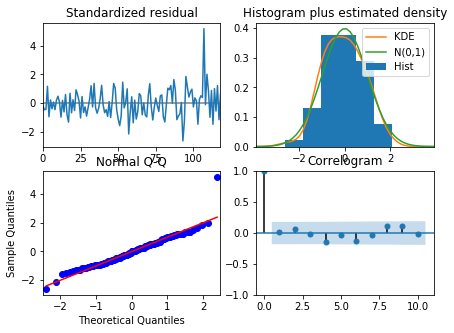

In [5]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

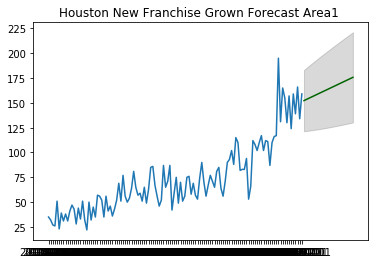

In [6]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecast Area1 ")
plt.show()

In [7]:
confint

array([[121.41114016, 183.15034126],
       [121.65709498, 184.94264972],
       [121.92149666, 186.71651131],
       [122.20308466, 188.47318658],
       [122.50073579, 190.21379873],
       [122.8134441 , 191.9393537 ],
       [123.14030446, 193.65075662],
       [123.48049894, 195.34882541],
       [123.83328551, 197.03430212],
       [124.19798847, 198.70786244],
       [124.57399051, 200.37012368],
       [124.96072582, 202.02165164],
       [125.35767431, 203.66296643],
       [125.76435657, 205.29454744],
       [126.18032958, 206.9168377 ],
       [126.60518292, 208.53024764],
       [127.03853554, 210.1351583 ],
       [127.48003288, 211.73192424],
       [127.92934435, 213.32087604],
       [128.38616118, 214.90232249],
       [128.85019437, 216.47655258],
       [129.32117302, 218.0438372 ],
       [129.79884278, 219.60443072],
       [130.28296444, 221.15857233]])

In [9]:
#14

C:\Users\foxru\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


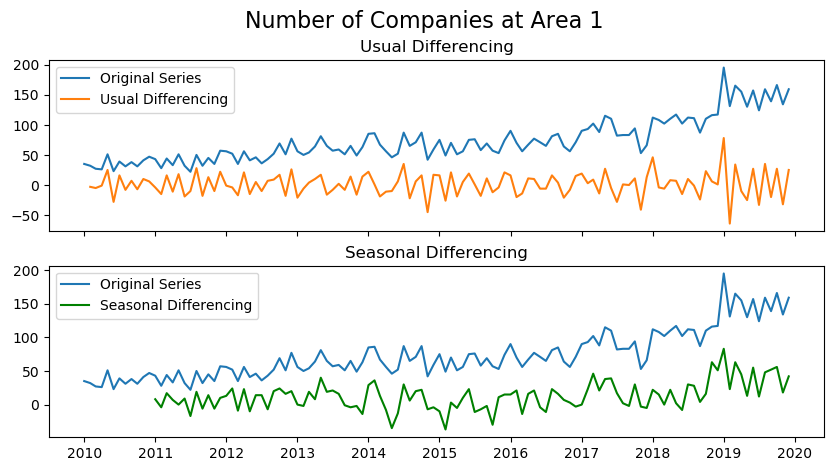

In [8]:
# Import
data = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Companies at Area 1', fontsize=16)
plt.show()

In [9]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=907.492, BIC=920.856, Time=1.568 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=978.751, BIC=984.097, Time=0.044 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=930.620, BIC=941.312, Time=1.054 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=905.682, BIC=916.373, Time=0.872 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=976.771, BIC=979.444, Time=0.038 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=932.747, BIC=940.766, Time=0.212 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=907.663, BIC=921.027, Time=1.432 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=907.666, BIC=921.030, Time=2.310 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=912.483, BIC=923.175, Time=0.636 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=909.133, BIC=925.170, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -448.841
Date:                            Sun, 29 Mar 2020   AIC                            905.682
Time:                                    23:21:54   BIC                            916.373
Sample:                                         0   HQIC                           910.016
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2512      0.144      1.743      0.081      -0.031       0.534
ma.L1         -0.7883      0.060    -13.178      0.000      -0.906      -0.671
ma.S.L12      -0.6618      0.114     -5.793      0.000      -0.886      -0.438
sigma2       239.2016     29.020      8.243      0.000     182.323     296.081
===================================================================================
Ljung-Box (Q):                       35.56   Jarque-Bera (JB):                 6.70
Prob(Q):                              0.67   Prob(JB):                         0.04
Heteroskedasticity (H):               2.93   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

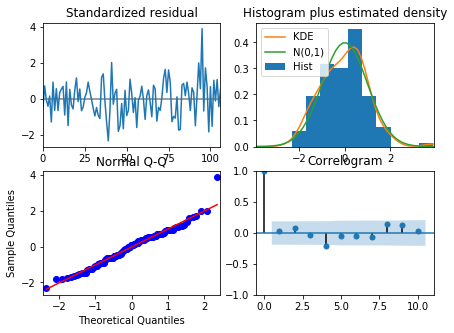

In [10]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

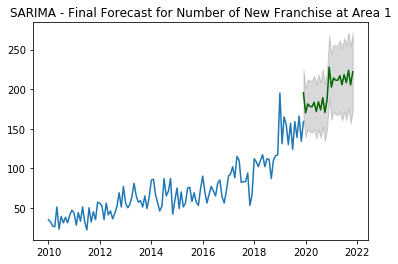

In [11]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast for Number of New Franchise at Area 1")
plt.show()

In [12]:
confint

array([[165.22843728, 225.86160767],
       [138.99242078, 200.96866436],
       [149.66633236, 212.9571543 ],
       [145.98396415, 210.56261012],
       [144.88901006, 210.73029565],
       [149.88290644, 216.96306939],
       [137.53460349, 205.83117466],
       [149.40525988, 218.89695009],
       [138.53183927, 209.19843945],
       [153.34250772, 225.1648006 ],
       [134.00966041, 206.96934193],
       [149.79663862, 223.87624833],
       [187.31944176, 268.56057209],
       [161.10850251, 244.14488384],
       [171.81224439, 256.60587578],
       [168.16417179, 254.6793683 ],
       [167.10771881, 255.31088501],
       [172.14408627, 262.00351999],
       [159.84200998, 251.32773089],
       [171.76245292, 264.84605208],
       [160.94219943, 255.59670663],
       [175.80925083, 272.00901712],
       [156.53585054, 254.25644374],
       [172.38519951, 271.60331168]])

In [15]:
#15

In [13]:
# Import Data
data = pd.read_csv('2010_zip_1_monthly_data.csv', parse_dates=['date'], index_col='date')

In [14]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [15]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=918.174, BIC=934.267, Time=3.360 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=966.778, BIC=974.824, Time=0.119 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=941.173, BIC=954.583, Time=1.192 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=950.824, BIC=964.234, Time=1.209 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=1000.269, BIC=1005.633, Time=0.266 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=944.595, BIC=958.005, Time=0.979 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=920.172, BIC=938.947, Time=3.104 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=920.172, BIC=938.947, Time=8.148 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=925.270, BIC=941.363, Time=2.145 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=921.760, BIC=943.217, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -453.087
Date:                            Sun, 29 Mar 2020   AIC                            918.174
Time:                                    23:23:43   BIC                            934.267
Sample:                                01-01-2010   HQIC                           924.699
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.3065      0.513      0.597      0.550      -0.699       1.312
seasonal_index    -0.0007   3.99e+04  -1.77e-08      1.000   -7.82e+04    7.82e+04
ar.L1              0.9776      0.046     21.096      0.000       0.887       1.068
ma.L1             -0.7318      0.097     -7.582      0.000      -0.921      -0.543
ma.S.L12          -0.6761      0.115     -5.901      0.000      -0.901      -0.452
sigma2           241.0973     29.747      8.105      0.000     182.794     299.401
===================================================================================
Ljung-Box (Q):                       35.42   Jarque-Bera (JB):                 8.76
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               3.27   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""